# Univariate Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parse data, define m and n values

points = np.genfromtxt('ex1data1.txt', delimiter = ',')
m, n = points.shape

x = np.array(points[:, :-1]) 
y = np.array(points[:, -1:]) # We do -1: to make sure the shape of y is (m,1) instead of (m,)

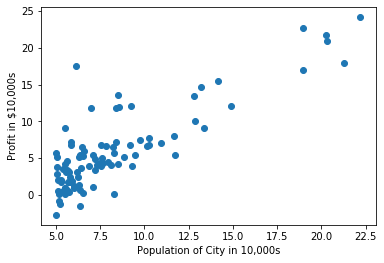

In [3]:
plt.scatter(x, y, marker = 'o')

plt.xlabel('Population of City in 10,000s')
plt.ylabel("Profit in $10,000s")
plt.show()

In [4]:
# Add a column of ones to x, we will call this X
ones = np.ones((m,1))
X = np.hstack((ones, x))

In [5]:
#Hyperparameters
iterations = 20000
alpha = 0.01

theta = np.zeros((n, 1))

In [6]:
def cost(x, y, theta):
    #Number of training samples
    m = y.shape[0]
    cost = np.square(np.dot(x, theta) - y)
    J = cost.sum()/(2 * m)
    return J

In [7]:
def gradient_descent(x, y, theta, alpha, iterations):
    m = y.shape[0]
    
    theta_new = np.ones((np.shape(theta)[0], np.shape(theta)[1]))
    theta_history = []
    
    for i in range(iterations):
        theta_new = theta_new - alpha * np.dot(x.T, (np.dot(x, theta_new) - y)) /m
        theta_history.append(theta_new)
        
    return theta_new, theta_history 

theta, theta_hist = gradient_descent(X,y,theta,alpha,iterations)

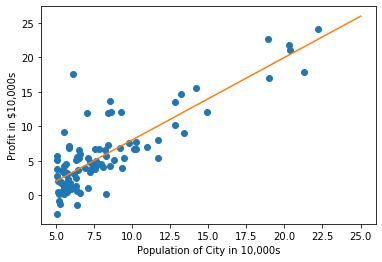

In [8]:
#Set up the hypothesis for plotting

x_plt = np.arange(5,26,5)
y_plt = theta[0] + theta[1] * x_plt

#Plot both the data points as well as the line of best fit
plt.plot(x, y, 'o')
plt.plot(x_plt,y_plt)
plt.xlabel('Population of City in 10,000s')
plt.ylabel("Profit in $10,000s")
plt.show() 

In [9]:
# Final cost
cost(X,y,theta)

4.476971375975179

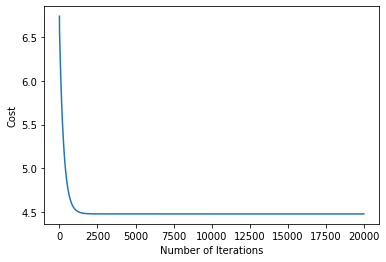

In [10]:
# Plotting Cost over the Number of Iterations
cost_x = np.arange(iterations)
cost_y = np.zeros((iterations))

for i in range(iterations):
    # We need to reshape theta_hist[i] because we want to feed in a [2x1] matrix
    cost_y[i] = cost(X,y,theta_hist[i])
    
#Plot both the data points as well as the line of best fit
plt.plot(cost_y)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show() 